## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
import seaborn as sns

# Breast Cancer Dataset

In [2]:
data = pd.read_csv("Dataset/breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

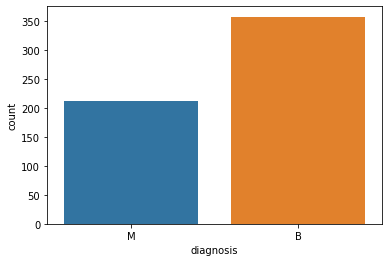

In [3]:
sns.countplot(x="diagnosis",data=data)

# Preprocessing

In [4]:
X = data.iloc[:,2:]
Y = data.diagnosis

## Scaling
### StandardScale

In [5]:
SS = StandardScaler()
X = SS.fit_transform(X)

## Convert categorical to numeric
### Label Encoder

In [6]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [7]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# Model

### KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [9]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        39

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


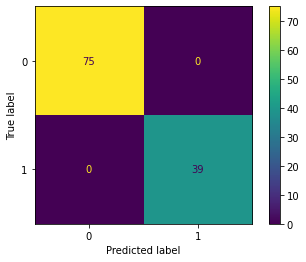

In [10]:
metrics.plot_confusion_matrix(knn,x_test,y_test)

### SVC

In [11]:
svc = SVC(C=3,random_state=0)
svc.fit(x_train,y_train)
predict_svc = svc.predict(x_test)

In [12]:
print(metrics.classification_report(y_test,predict_svc))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


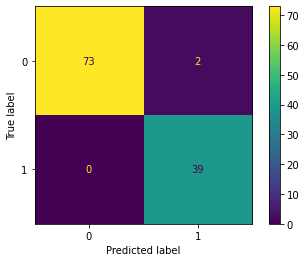

In [13]:
metrics.plot_confusion_matrix(svc,x_test,y_test)

### RandomForestClassifier

In [14]:
RF = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=0)
RF.fit(x_train,y_train)
predict_rf = RF.predict(x_test)

In [15]:
print(metrics.classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


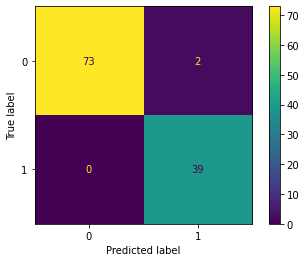

In [16]:
metrics.plot_confusion_matrix(RF,x_test,y_test)

### AdaBoostClassifier

In [17]:
adaboost = AdaBoostClassifier(n_estimators=300,random_state=0)
adaboost.fit(x_train,y_train)
predict_ab = adaboost.predict(x_test)

In [18]:
print(metrics.classification_report(y_test,predict_ab))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


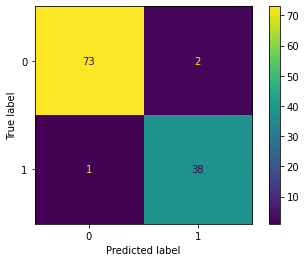

In [19]:
metrics.plot_confusion_matrix(adaboost,x_test,y_test)

### GBoostingClassifier

In [20]:
Gboost = GradientBoostingClassifier(subsample=0.5,random_state=0)
Gboost.fit(x_train,y_train)
predict_gb = Gboost.predict(x_test)

In [21]:
print(metrics.classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


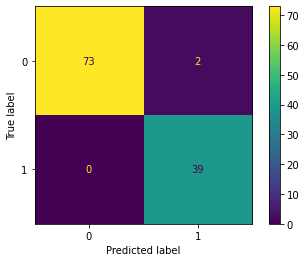

In [22]:
metrics.plot_confusion_matrix(Gboost,x_test,y_test)

### XGBoostClassifier

In [23]:
XGboost = XGBRFClassifier()
XGboost.fit(x_train,y_train)
predict_xb = XGboost.predict(x_test)

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
print(metrics.classification_report(y_test,predict_xb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


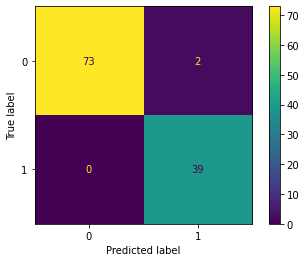

In [25]:
metrics.plot_confusion_matrix(XGboost,x_test,y_test)

### CatBoostClassifier

In [26]:
catboost = CatBoostClassifier(iterations=200,learning_rate=0.1,eval_metric="Accuracy",task_type="GPU",random_state=0)
catboost.fit(x_train,y_train,[],eval_set=(x_test,y_test))

0:	learn: 0.9780220	test: 0.9824561	best: 0.9824561 (0)	total: 12ms	remaining: 2.4s
1:	learn: 0.9824176	test: 0.9736842	best: 0.9824561 (0)	total: 21.8ms	remaining: 2.16s
2:	learn: 0.9846154	test: 0.9649123	best: 0.9824561 (0)	total: 31.6ms	remaining: 2.07s
3:	learn: 0.9846154	test: 0.9649123	best: 0.9824561 (0)	total: 40.3ms	remaining: 1.98s
4:	learn: 0.9868132	test: 0.9824561	best: 0.9824561 (0)	total: 50.8ms	remaining: 1.98s
5:	learn: 0.9890110	test: 0.9824561	best: 0.9824561 (0)	total: 61ms	remaining: 1.97s
6:	learn: 0.9912088	test: 0.9824561	best: 0.9824561 (0)	total: 71ms	remaining: 1.96s
7:	learn: 0.9912088	test: 0.9824561	best: 0.9824561 (0)	total: 81.1ms	remaining: 1.95s
8:	learn: 0.9934066	test: 0.9824561	best: 0.9824561 (0)	total: 91.4ms	remaining: 1.94s
9:	learn: 0.9934066	test: 0.9824561	best: 0.9824561 (0)	total: 101ms	remaining: 1.92s
10:	learn: 0.9934066	test: 0.9912281	best: 0.9912281 (10)	total: 110ms	remaining: 1.89s
11:	learn: 0.9934066	test: 0.9824561	best: 0.99122

In [27]:
catboost.best_score_

{'learn': {'Accuracy': 1.0, 'Logloss': 0.0019069506571843073},
 'validation': {'Accuracy': 0.9912280701754386,
  'Logloss': 0.050833229433026234}}

In [28]:
predict_cat = catboost.predict(x_test)
print(metrics.classification_report(y_test,predict_cat))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


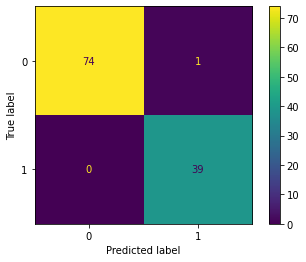

In [29]:
metrics.plot_confusion_matrix(catboost,x_test,y_test)